In [1]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap 
import lightgbm as lgb
from lime import lime_tabular
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load and preprocess data Train
file_path = '/home/data3/Ali/Code/Moghis/Train-data-preprocessed-2.xlsx'
data = pd.read_excel(file_path)


# Load and preprocess data Test
file_path = '/home/data3/Ali/Code/Moghis/Test-data-preprocessed-2.xlsx'
data_test = pd.read_excel(file_path)

# Define features and target
features = [
    'age_03', 'urban_03', 'married_03', 'n_mar_03', 'edu_gru_03', 'n_living_child_03',
    'migration_03', 'glob_hlth_03', 'adl_dress_03', 'adl_walk_03', 'adl_bath_03', 'adl_eat_03',
    'adl_bed_03', 'adl_toilet_03', 'n_adl_03', 'iadl_money_03', 'iadl_meds_03', 'iadl_shop_03',
    'iadl_meals_03', 'n_iadl_03', 'depressed_03', 'hard_03', 'restless_03', 'happy_03', 'lonely_03',
    'enjoy_03', 'sad_03', 'tired_03', 'energetic_03', 'n_depr_03', 'cesd_depressed_03',
    'hypertension_03', 'diabetes_03', 'resp_ill_03', 'arthritis_03', 'hrt_attack_03', 'stroke_03',
    'cancer_03', 'n_illnesses_03', 'exer_3xwk_03', 'alcohol_03', 'tobacco_03', 'test_chol_03',
    'test_tuber_03', 'test_diab_03', 'test_pres_03', 'hosp_03', 'visit_med_03', 'out_proc_03',
    'visit_dental_03', 'imss_03', 'issste_03', 'pem_def_mar_03', 'insur_private_03', 'insur_other_03',
    'insured_03', 'decis_personal_03', 'employment_03', 'age_12', 'urban_12', 'married_12',
    'n_mar_12', 'edu_gru_12', 'n_living_child_12', 'migration_12', 'glob_hlth_12', 'adl_dress_12',
    'adl_walk_12', 'adl_bath_12', 'adl_eat_12', 'adl_bed_12', 'adl_toilet_12', 'n_adl_12',
    'iadl_money_12', 'iadl_meds_12', 'iadl_shop_12', 'iadl_meals_12', 'n_iadl_12', 'depressed_12',
    'hard_12', 'restless_12', 'happy_12', 'lonely_12', 'enjoy_12', 'sad_12', 'tired_12',
    'energetic_12', 'n_depr_12', 'cesd_depressed_12', 'hypertension_12', 'diabetes_12',
    'resp_ill_12', 'arthritis_12', 'hrt_attack_12', 'stroke_12', 'cancer_12', 'n_illnesses_12',
    'bmi_12', 'exer_3xwk_12', 'alcohol_12', 'tobacco_12', 'test_chol_12', 'test_tuber_12',
    'test_diab_12', 'test_pres_12', 'hosp_12', 'visit_med_12', 'out_proc_12', 'visit_dental_12',
    'imss_12', 'issste_12', 'pem_def_mar_12', 'insur_private_12', 'insur_other_12', 'insured_12',
    'decis_famil_12', 'decis_personal_12', 'employment_12', 'vax_flu_12', 'vax_pneu_12', 'seg_pop_12',
    'care_adult_12', 'care_child_12', 'volunteer_12', 'attends_class_12', 'attends_club_12',
    'reads_12', 'games_12', 'table_games_12', 'comms_tel_comp_12', 'act_mant_12', 'tv_12',
    'sewing_12', 'satis_ideal_12', 'satis_excel_12', 'satis_fine_12', 'cosas_imp_12',
    'wouldnt_change_12', 'memory_12', 'ragender', 'rameduc_m', 'rafeduc_m', 'sgender_03',
    'rearnings_03', 'searnings_03', 'hincome_03', 'hinc_business_03', 'hinc_rent_03', 'hinc_assets_03',
    'hinc_cap_03', 'rinc_pension_03', 'sinc_pension_03', 'rrelgimp_03', 'sgender_12', 'rjlocc_m_12',
    'rearnings_12', 'searnings_12', 'hincome_12', 'hinc_business_12', 'hinc_rent_12', 'hinc_assets_12',
    'hinc_cap_12', 'rinc_pension_12', 'sinc_pension_12', 'rrelgimp_12', 'rrfcntx_m_12',
    'rsocact_m_12', 'rrelgwk_12', 'a34_12', 'j11_12', 'year', 'hincome_change',
    'niadl_change', 'adl_change', 'depr_change', 'glob_hlth_change', 'edu_gru_change',
    'illnesses_change'
    ]

target = 'composite_score'

######################## Process Train Data ####################
data = data.apply(pd.to_numeric, errors='coerce')
data = data.fillna(data[features].mean())
data = pd.DataFrame(data, columns=features + [target])

######################## Process Train Data ####################
data[features] = data[features].apply(pd.to_numeric, errors='coerce')
data[features] = data[features].fillna(data[features].mean())
data = data.dropna(subset=[target])

X_train = data[features]
y_train = data[target]

######################## Process Test Data ####################
data_test[features] = data_test[features].apply(pd.to_numeric, errors='coerce')
data_test[features] = data_test[features].fillna(data[features].mean())
data_test = data_test.dropna(subset=[target])

X_test = data_test[features]
y_test = data_test[target]
############################################

/home/defuser/miniconda3/envs/moghis/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## CatBoost ##

0:	learn: 60.2517468	test: 62.6906150	best: 62.6906150 (0)	total: 52.2ms	remaining: 1m 3s
100:	learn: 40.9341441	test: 43.4834111	best: 43.4834111 (100)	total: 202ms	remaining: 2.25s
200:	learn: 38.0120283	test: 41.3414640	best: 41.3414640 (200)	total: 351ms	remaining: 1.79s
300:	learn: 36.4267240	test: 40.7496761	best: 40.7496761 (300)	total: 500ms	remaining: 1.53s
400:	learn: 34.6819244	test: 40.4018847	best: 40.4018847 (400)	total: 649ms	remaining: 1.33s
500:	learn: 32.9931662	test: 40.2747615	best: 40.2711114 (466)	total: 800ms	remaining: 1.15s
600:	learn: 31.5879576	test: 40.2068020	best: 40.2068020 (600)	total: 949ms	remaining: 983ms
700:	learn: 30.3280088	test: 40.2107645	best: 40.2026078 (696)	total: 1.1s	remaining: 818ms
800:	learn: 29.2108637	test: 40.2417149	best: 40.1976485 (703)	total: 1.25s	remaining: 657ms
900:	learn: 28.0972662	test: 40.2267646	best: 40.1852203 (860)	total: 1.39s	remaining: 499ms
1000:	learn: 27.1074965	test: 40.2060882	best: 40.1852203 (860)	total: 1.5

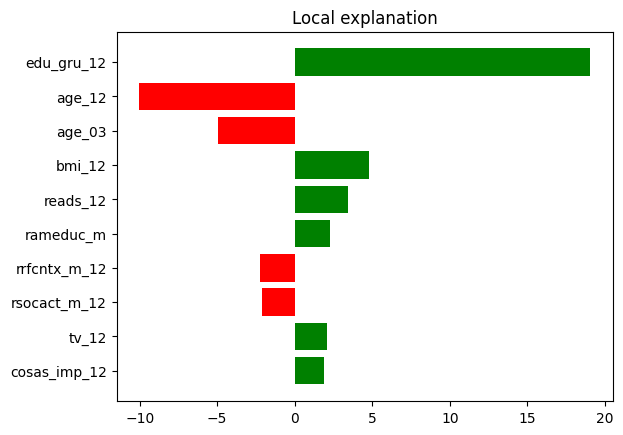

In [2]:
# Best parameters for CatBoost
best_params = {
    'depth': 6,
    'learning_rate': 0.025804617832891515,
    'l2_leaf_reg': 0.22567510948252656,
    'random_strength': 1.8064759944089426,
    'bagging_temperature': 0.4675254776654324,
    'iterations': 1224
}

# Initialize and train CatBoostRegressor
model = CatBoostRegressor(**best_params, loss_function='RMSE', verbose=100, early_stopping_rounds=500, random_state=42)
model.fit(X_train, y_train, eval_set=(X_test, y_test))

y_pred = model.predict(X_test)

# Initialize LIME explainer with discretization disabled
explainer = lime_tabular.LimeTabularExplainer(training_data= X_train.values, feature_names= features, mode='regression', discretize_continuous=False)

# Explain a single prediction
sample_index = 0  # Select a sample from test data
explanation = explainer.explain_instance(data_row=X_test.values[sample_index], predict_fn=model.predict)

# Print explanation
print("\nLIME Explanation for a single instance:")
for feature, weight in explanation.as_list():
    print(f"{feature}: {weight}")

# Plot explanation
explanation.as_pyplot_figure()
plt.show()


## LightBoost ##

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train set: 4338, number of used features: 154
[LightGBM] [Info] Start training from score 157.040341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 500 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

/home/defuser/miniconda3/envs/moghis/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

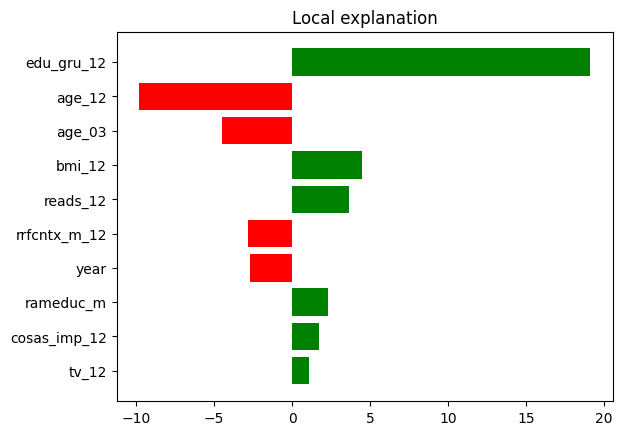

In [3]:
# Split the data
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train, y_train, test_size=0.001, random_state=42)

# Best parameters for CatBoost
best_params = {
  'learning_rate': 0.07089438962267576,
  'num_leaves': 49,
  'max_depth': 4,
  'feature_fraction': 0.4839642718097913,
  'bagging_fraction': 0.5497799156909652,
  'lambda_l1': 0.058207015936292725,
  'lambda_l2': 0.08350139961819975,
  'min_child_samples': 85,
  'n_estimators': 4077
}

model2 = lgb.train(
    params=best_params,
    train_set=lgb.Dataset(X_train1, label=y_train1),
    valid_sets=lgb.Dataset(X_val1, label=y_val1),
    num_boost_round=best_params['n_estimators'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=500, verbose=True),
    ]
)

# Make predictions
y_pred = model2.predict(X_test)

# Initialize LIME explainer with discretization disabled
explainer = lime_tabular.LimeTabularExplainer(training_data= X_train.values, feature_names= features, mode='regression', discretize_continuous=False)

# Explain a single prediction
sample_index = 0  # Select a sample from test data
explanation = explainer.explain_instance(data_row=X_test.values[sample_index], predict_fn=model.predict)

# Print explanation
print("\nLIME Explanation for a single instance:")
for feature, weight in explanation.as_list():
    print(f"{feature}: {weight}")

# Plot explanation
explanation.as_pyplot_figure()
plt.show()


## Random Forest 


LIME Explanation for a single instance:
edu_gru_12: 19.444031227266453
age_12: -9.790051451388814
bmi_12: 4.502623054746476
age_03: -4.3416024538194815
reads_12: 3.504127280887504
rrfcntx_m_12: -2.4772213468778292
rameduc_m: 2.2914446362413794
year: -2.162917244552602
cosas_imp_12: 1.70414681922406
tv_12: 1.2003624584393457


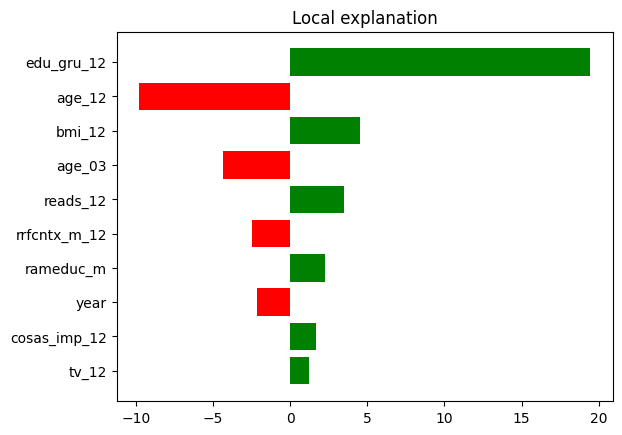

In [4]:
# Best parameters for CatBoost
best_params = {
  'max_depth': 30,
  'min_samples_split': 22,
  'min_samples_leaf': 6,
  'max_features': 0.8191960808589205,
  'n_estimators': 97
}

model2 = RandomForestRegressor(**best_params, random_state=42)
model2.fit(X_train, y_train)

# Make predictions
y_pred = model2.predict(X_test)

# Initialize LIME explainer with discretization disabled
explainer = lime_tabular.LimeTabularExplainer(training_data= X_train.values, feature_names= features, mode='regression', discretize_continuous=False)

# Explain a single prediction
sample_index = 0  # Select a sample from test data
explanation = explainer.explain_instance(data_row=X_test.values[sample_index], predict_fn=model.predict)

# Print explanation
print("\nLIME Explanation for a single instance:")
for feature, weight in explanation.as_list():
    print(f"{feature}: {weight}")

# Plot explanation
explanation.as_pyplot_figure()
plt.show()

## XGBoost

[0]	validation_0-rmse:69.98426
[1]	validation_0-rmse:69.06622
[2]	validation_0-rmse:67.99870
[3]	validation_0-rmse:67.49996
[4]	validation_0-rmse:66.75705
[5]	validation_0-rmse:66.09788
[6]	validation_0-rmse:65.30352
[7]	validation_0-rmse:64.70880
[8]	validation_0-rmse:63.66281
[9]	validation_0-rmse:63.06104
[10]	validation_0-rmse:62.53707
[11]	validation_0-rmse:61.96129
[12]	validation_0-rmse:61.45977
[13]	validation_0-rmse:60.90564
[14]	validation_0-rmse:60.47808
[15]	validation_0-rmse:59.88395
[16]	validation_0-rmse:59.48792
[17]	validation_0-rmse:59.11460
[18]	validation_0-rmse:58.77374
[19]	validation_0-rmse:58.27439
[20]	validation_0-rmse:58.14298
[21]	validation_0-rmse:57.76494
[22]	validation_0-rmse:57.59539
[23]	validation_0-rmse:57.42434
[24]	validation_0-rmse:57.00811
[25]	validation_0-rmse:56.70108
[26]	validation_0-rmse:56.39391
[27]	validation_0-rmse:56.18106
[28]	validation_0-rmse:56.04892
[29]	validation_0-rmse:55.63193
[30]	validation_0-rmse:55.45245
[31]	validation_0-

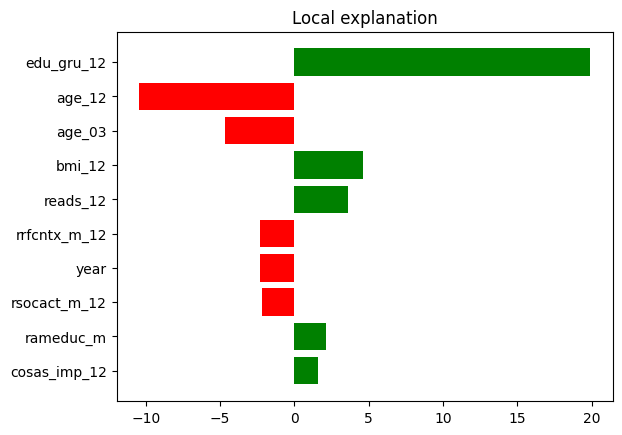

In [5]:
# Split the data
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size=0.001, random_state=42)

# Best parameters for XGBoost
best_params = {
  'learning_rate': 0.033763045458285304,
  'max_depth': 3,
  'min_child_weight': 14,
  'subsample': 0.9500263286639197,
  'colsample_bytree': 0.7747635615654157,
  'gamma': 7.558507636378349,
  'reg_alpha': 0.4378783168336932,
  'reg_lambda': 2.8408676886824322,
  'n_estimators': 2804
  }


model2 = XGBRegressor(**best_params, random_state=42)
model2.fit(X_train2, y_train2, eval_set=[(X_val2, y_val2)], verbose=True)

# Make predictions
y_pred = model2.predict(X_test)

# Initialize LIME explainer with discretization disabled
explainer = lime_tabular.LimeTabularExplainer(training_data= X_train.values, feature_names= features, mode='regression', discretize_continuous=False)

# Explain a single prediction
sample_index = 0  # Select a sample from test data
explanation = explainer.explain_instance(data_row=X_test.values[sample_index], predict_fn=model.predict)

# Print explanation
print("\nLIME Explanation for a single instance:")
for feature, weight in explanation.as_list():
    print(f"{feature}: {weight}")

# Plot explanation
explanation.as_pyplot_figure()
plt.show()